### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

### Answer(1):

(a)(d)

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one.

(b) $y'<2y$ if b is less than one.

(c) $y'=2y$ in any case.

(d) $y'$ increases by $(2^b-1)*100\%$.

### Answer(2):

(a)(b)(d)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [3]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [4]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [5]:
import math
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x2 = 0
sum_y2= 0
n = len(x)
for i in range(n):
    sum_x += x[i]
    sum_y += y[i]
    sum_xy += x[i] * y[i]
    sum_x2 += x[i] * x[i]
    sum_y2 += y[i] * y[i]

corr_xy = (n * sum_xy - sum_x * sum_y) / math.sqrt((n * sum_x2 - sum_x * sum_x) * (n * sum_y2 - sum_y * sum_y))

print corr_xy

0.957143492915


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [8]:
w1 = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x * sum_x / n)
print ('w1 = %f' %w1)
w0 = (sum_y - w1 * sum_x) / n
print ('w0 = %f' %w0)

w1 = 10.546617
w0 = 4.257143


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [11]:
data = pd.DataFrame([list(x),list(y)]).T
data.colums = ["x", "y"]
data.head()

,0,1
0,0.0,28.0
1,1.0,24.0
2,2.0,37.0
3,3.0,-7.0
4,4.0,28.0


In [14]:
data.corr()

,0,1
0,1.000000,0.957143
1,0.957143,1.000000


In [12]:
lm = smf.ols(formula = 'y ~ x', data = data).fit()

In [13]:
print lm.params

Intercept     4.257143
x            10.546617
dtype: float64


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [15]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [16]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
3,NaN,0,0
4,11201.0,387060,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [49]:
data_4.dropna(axis = 0, how = 'any', inplace = True)
data_4.drop(data_4.index[(data_4 == 0).any(axis = 1)], inplace = True)
data_4['ZipCode'] = data_4['ZipCode'].astype(int)
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201,151930,1164645
1,11201,9620,5864850
2,11201,19682,12019950
5,11201,6384,21150
10,11201,66889,11700


#### (b). Visualize the data set.

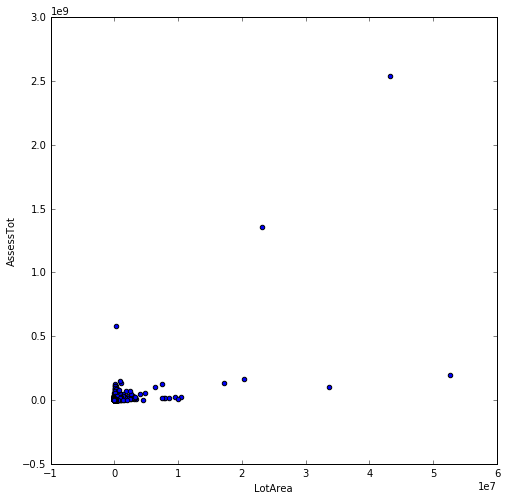

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(x = data_4.LotArea, y = data_4.AssessTot)

plt.xlabel('LotArea')
plt.ylabel('AssessTot')
plt.show()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [60]:
lm2 = smf.ols(formula = 'AssessTot ~ LotArea', data = data_4).fit()
print ("R Square = %f" %lm2.rsquared)
print (lm2.params)

R Square = 0.384460
Intercept    76944.297838
LotArea         21.160374
dtype: float64


In [63]:
data_4['pred'] = lm2.params['LotArea'] * data_4['LotArea'] + lm2.params['Intercept']
data_4['err'] = data_4['AssessTot'] - data_4['pred']
data_4.head()

,ZipCode,LotArea,AssessTot,pred,err
0,11201,151930,1164645,3.291840e+06,-2.127195e+06
1,11201,9620,5864850,2.805071e+05,5.584343e+06
2,11201,19682,12019950,4.934228e+05,1.152653e+07
5,11201,6384,21150,2.120321e+05,-1.908821e+05
10,11201,66889,11700,1.492341e+06,-1.480641e+06


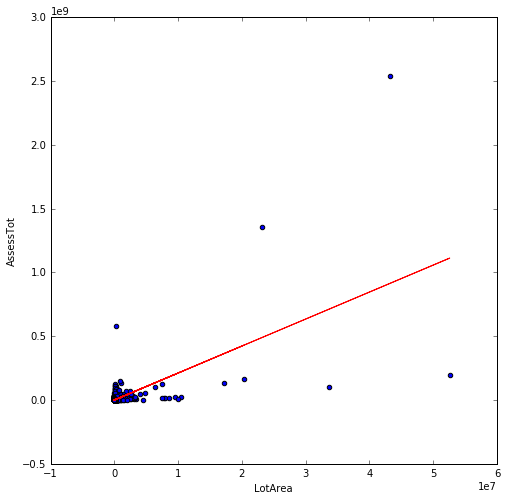

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(x = data_4.LotArea, y = data_4.AssessTot)
plt.plot(data_4.LotArea, data_4.pred, c = "r")

plt.xlabel('LotArea')
plt.ylabel('AssessTot')
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [424]:
lm2_2 = smf.ols(formula = 'AssessTot ~ LotArea + 0', data = data_4).fit()
print ("R Square = %f" %lm2_2.rsquared)
print (lm2_2.params)

R Square = 0.384915
LotArea    21.174079
dtype: float64


In [425]:
data_4['pred_0'] = lm2_2.params['LotArea'] * data_4['LotArea']
data_4['err_0'] = data_4['AssessTot'] - data_4['pred_0']
data_4.head()

,ZipCode,LotArea,AssessTot,pred,err,pred_0,err_0
0,11201,151930,1164645,3.291840e+06,-2.127195e+06,3.216978e+06,-2.052333e+06
1,11201,9620,5864850,2.805071e+05,5.584343e+06,2.036946e+05,5.661155e+06
2,11201,19682,12019950,4.934228e+05,1.152653e+07,4.167482e+05,1.160320e+07
5,11201,6384,21150,2.120321e+05,-1.908821e+05,1.351753e+05,-1.140253e+05
10,11201,66889,11700,1.492341e+06,-1.480641e+06,1.416313e+06,-1.404613e+06


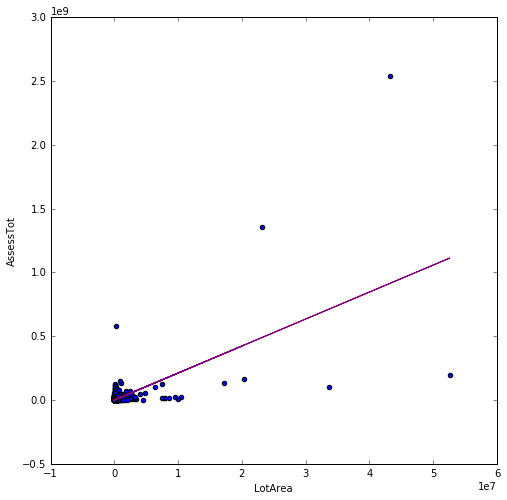

In [426]:
plt.figure(figsize=(8,8))
plt.scatter(x = data_4.LotArea, y = data_4.AssessTot)
plt.plot(data_4.LotArea, data_4.pred, "r")
plt.plot(data_4.LotArea, data_4.pred_0, "b", alpha = 0.5)

plt.xlabel('LotArea')
plt.ylabel('AssessTot')
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [73]:
data_5 = data_4.loc[:, ["LotArea", "AssessTot"]]
data_5["log_LotArea"] = np.log(data_5["LotArea"])
data_5["log_AssessTot"] = np.log(data_5["AssessTot"])
data_5.head()

,LotArea,AssessTot,log_LotArea,log_AssessTot
0,151930,1164645,11.931175,13.967927
1,9620,5864850,9.171600,15.584487
2,19682,12019950,9.887460,16.302078
5,6384,21150,8.761550,9.959395
10,66889,11700,11.110790,9.367344


In [74]:
lm3 = smf.ols(formula = 'log_AssessTot ~ log_LotArea', data = data_5).fit()
print ("R Square = %f" %lm3.rsquared)
print (lm3.params)

R Square = 0.490744
Intercept      0.207382
log_LotArea    1.325149
dtype: float64


In [75]:
data_5['pred'] = lm3.params['log_LotArea'] * data_5['log_LotArea'] + lm3.params['Intercept']
data_5['err'] = data_5['AssessTot'] - data_5['pred']
data_5.head()

,LotArea,AssessTot,log_LotArea,log_AssessTot,pred,err
0,151930,1164645,11.931175,13.967927,16.017968,1.164629e+06
1,9620,5864850,9.171600,15.584487,12.361119,5.864838e+06
2,19682,12019950,9.887460,16.302078,13.309740,1.201994e+07
5,6384,21150,8.761550,9.959395,11.817742,2.113818e+04
10,66889,11700,11.110790,9.367344,14.930835,1.168507e+04


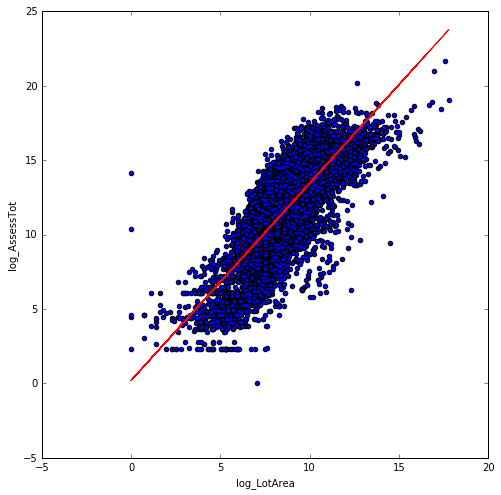

In [76]:
plt.figure(figsize=(8,8))
plt.scatter(x = data_5.log_LotArea, y = data_5.log_AssessTot)
plt.plot(data_5.log_LotArea, data_5.pred, c = "r")

plt.xlabel('log_LotArea')
plt.ylabel('log_AssessTot')
plt.show()

### what does the estimated "$w_1$" means?
log_AssessTot=$w_1 *$ log_LotArea  $+w_2$

It means:

AssessTot = (log_LotArea) $^{w_1} * e^{w_2}$

### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.

#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).

#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

In [78]:
data_a = pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")
data_a.dropna(axis = 0, how = 'any', inplace = True)
data_a.drop(data_a.index[(data_a == 0).any(axis = 1)], inplace = True)
data_a['ZipCode'] = data_a['ZipCode'].astype(int)
data_a.head()

,ZipCode,LotArea,AssessTot
0,11201,151930,1164645
1,11201,9620,5864850
2,11201,19682,12019950
5,11201,6384,21150
10,11201,66889,11700


### (a)

In [167]:
group_a = data_a.groupby(data_a["ZipCode"])
count_a = pd.DataFrame(group_a.size())
count_a.columns = ['number of observations']
count_a.head()

,number of observations
ZipCode,
11201,3361
11203,11011
11204,9946
11205,3196
11206,4665


### (b)

In [384]:
mean_a = pd.DataFrame(group_a.AssessTot.mean()[group_a.ZipCode.count() > 1000])
mean_a.columns = ['average assessed total value']
mean_a.head()

,average assessed total value
ZipCode,
11201,1.672253e+06
11203,1.210203e+05
11204,1.045425e+05
11205,3.509409e+05
11206,3.115333e+05


### (c)

In [448]:
list_a = list(group_a)
n = len(list_a)
params_a = pd.DataFrame(np.zeros((n,3)))
for i in range(n):
    list(list_a[i])
    list_a[i][1]["log_LotArea"] = np.log(list_a[i][1]["LotArea"])
    list_a[i][1]["log_AssessTot"] = np.log(list_a[i][1]["AssessTot"])
    lm_a = smf.ols(formula = 'log_AssessTot ~ log_LotArea', data = list_a[i][1]).fit()
    params_a.iloc[i][0] = list_a[i][0]
    params_a.iloc[i][1] = lm_a.params['log_LotArea']
    params_a.iloc[i][2] = lm_a.params['Intercept']

In [449]:
params_a.columns = ["ZipCode","slope coefficient","Intercept"]
params_a['ZipCode'] = params_a['ZipCode'].astype(int)
params_a.head()

,ZipCode,slope coefficient,Intercept
0,11201,1.405662,1.063719
1,11203,1.391849,-0.514992
2,11204,1.280166,0.749454
3,11205,1.503683,-0.847322
4,11206,1.487366,-0.885102


### (d)

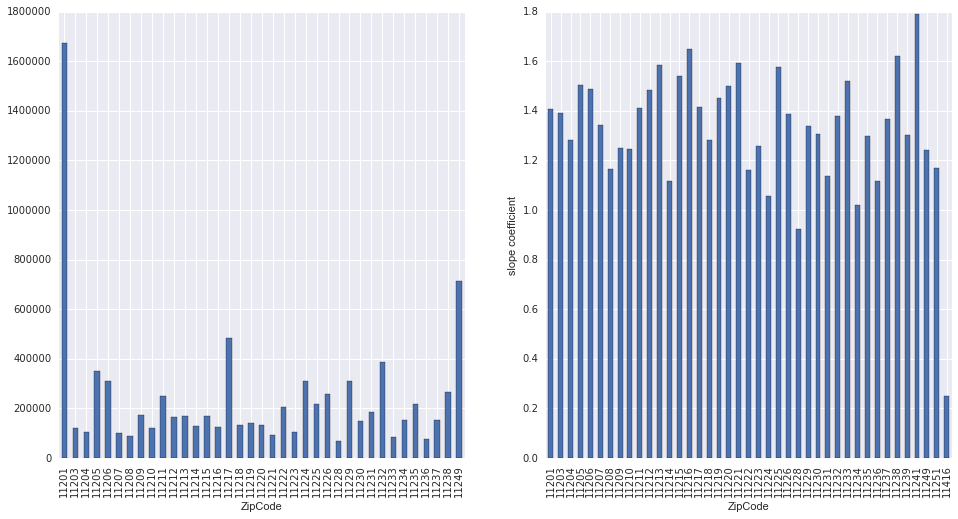

In [573]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

mean_a['average assessed total value'].plot.bar(ax = ax1)
ax1.xaxis.set_ticklabels(mean_a.index)
ax2.set_xlabel("ZipCode")
ax2.set_ylabel("average assessed total value")

params_a["slope coefficient"].plot.bar(ax = ax2)
ax2.xaxis.set_ticklabels(params_a.ZipCode)
ax2.set_xlabel("ZipCode")
ax2.set_ylabel("slope coefficient")

plt.show()

In [542]:
params_a.sort_values(by = "slope coefficient", ascending = False).head(5)

,ZipCode,slope coefficient,Intercept
37,11241,1.788466,0.189587
14,11216,1.649113,-2.251156
35,11238,1.621558,-1.764020
19,11221,1.592814,-2.143264
11,11213,1.584304,-1.940636
